In [7]:
import json
import glob
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def read_jsonl(file_path):
    with open(file_path, 'r') as f:
        return [json.loads(line) for line in f]

def calculate_stats(data):
    loss_differences = [item['loss_difference'] for item in data]
    return np.mean(loss_differences), np.std(loss_differences), len(loss_differences)

def process_all_files(file_pattern):
    results = []
    for file_path in sorted(glob.glob(file_pattern)):
        t = int(file_path.split('_')[-1].split('.')[0])
        if t >=5:
            continue
        data = read_jsonl(file_path)
        avg_loss_diff, std_loss_diff, count = calculate_stats(data)
        results.append((t, avg_loss_diff, std_loss_diff, count))
        print(f"cot_removal_results_{t}.jsonl - average: {avg_loss_diff:.4f}, std: {std_loss_diff:.4f}, count: {count}")
    return results

def plot_results(all_results):
    plt.figure(figsize=(12, 7))
    colors = ['purple', 'green', 'blue', 'red', 'orange']
    
    for idx, (dataset, results) in enumerate(all_results.items()):
        t_values, loss_diffs, stds, _ = zip(*results) 
        plt.plot(t_values, loss_diffs, color=colors[idx], marker='o', label=dataset)
        plt.errorbar(t_values, loss_diffs, yerr=stds, fmt='o-', color=colors[idx], capsize=5, capthick=2, ecolor=colors[idx], alpha=0.3)
    
    plt.xlabel('Number of Rationale Sentences Removed')
    plt.ylabel('Log Likelihood Differences for Full and Removal Rationales')
    plt.title(r'$ \frac{\log P(y|\tilde{r},x)}{\log P(y|r,x)}$ where $\tilde{r}$ is rationale with removal and $r$ is full rationale. ')
    plt.ylim(-0.6, 0.4)
    plt.xticks(range(1, max(t_values)+1))
    # plt.grid(False)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.tight_layout()
    plt.savefig('refined_multi_dataset_cot_removal_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

cot_removal_results_1.jsonl - average: 0.0665, std: 0.2373, count: 96
cot_removal_results_2.jsonl - average: 0.0406, std: 0.2546, count: 82
cot_removal_results_3.jsonl - average: 0.0387, std: 0.3691, count: 69
cot_removal_results_4.jsonl - average: 0.0451, std: 0.3832, count: 49
cot_removal_results_1.jsonl - average: -0.0406, std: 0.1989, count: 100
cot_removal_results_2.jsonl - average: -0.1118, std: 0.2514, count: 100
cot_removal_results_3.jsonl - average: -0.2488, std: 0.3717, count: 100
cot_removal_results_4.jsonl - average: -0.2380, std: 0.3968, count: 100
cot_removal_results_1.jsonl - average: 0.0317, std: 0.2492, count: 90
cot_removal_results_2.jsonl - average: 0.0592, std: 0.3164, count: 68
cot_removal_results_3.jsonl - average: 0.0320, std: 0.3720, count: 48
cot_removal_results_4.jsonl - average: 0.0799, std: 0.2691, count: 36
cot_removal_results_1.jsonl - average: -0.1051, std: 0.2663, count: 870
cot_removal_results_2.jsonl - average: -0.1156, std: 0.3105, count: 445
cot_remo

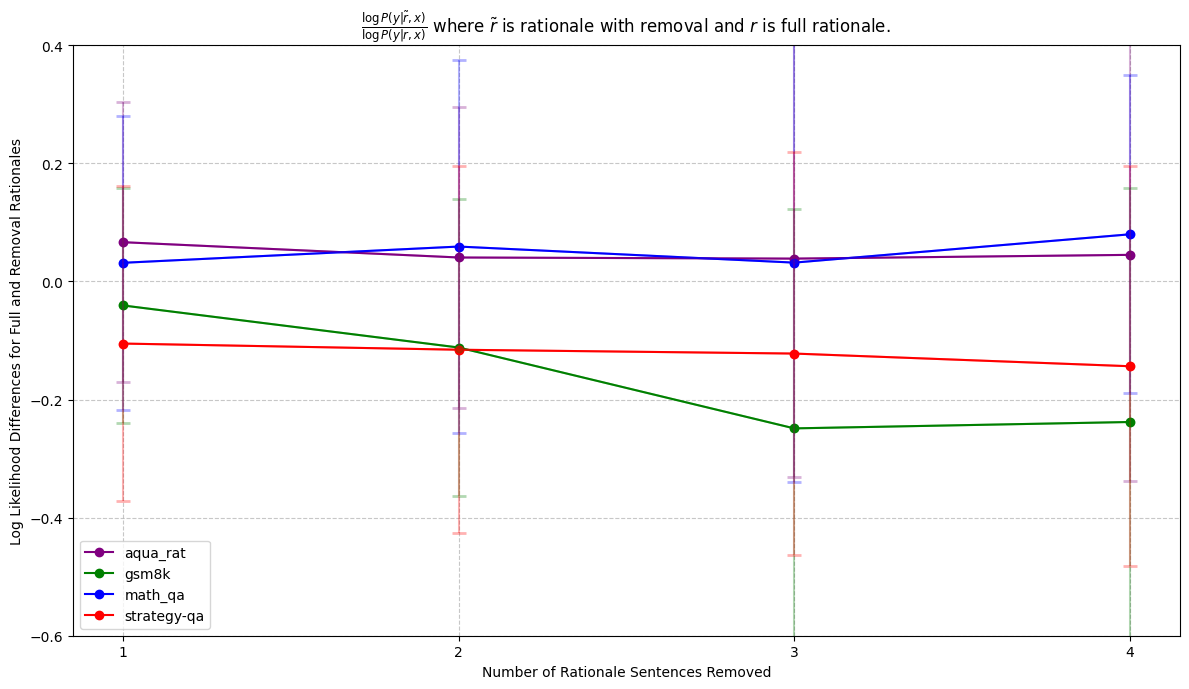

In [15]:
datasets = [
        'motivation-rationale-front/aqua_rat',
        'motivation-rationale-front/gsm8k',
        'motivation-rationale-front/math_qa',
        'motivation-rationale-front/strategy-qa',
    ]

# datasets = [
#         'motivation-rationale-random/aqua_rat',
#         'motivation-rationale-random/gsm8k',
#         'motivation-rationale-random/math_qa',
#         'motivation-rationale-random/strategy-qa',
#     ]

all_results = {}
for dataset in datasets:
    file_pattern = f'{dataset}/cot_removal_results_*.jsonl'
    results = process_all_files(file_pattern)
    all_results[dataset.split('/')[-1]] = results

plot_results(all_results)